Evaluation of Pre-trained model (Ratislav, 2021)

In [15]:
import os

if not os.path.exists("/content/BraTS2020_TrainingData") or not os.path.exists("/content/BraTS2020_ValidationData"):
  !unzip "/content/drive/MyDrive/Individual Project Final/brats_dataset.zip" > /dev/null

In [16]:
from unet_model import UNetModel
path = "/content/drive/MyDrive/Individual Project Final/saved_models/pre-trained_ratislav/model_per_class.h5"
# Loading the model with pre-trained weights, found at kaggle.com


model = UNetModel(models_path="/content/models", loss='categorical_crossentropy', modalities=['flair', 't1ce'])
model.load_model(model_path=path, compile=False)
model.compile_model()
model.evaluate_model()


Constructing UnetModel.
Using multilabel metrics
37/37 [==============================] - 283s 7s/step - loss: 0.0368 - accuracy: 0.9907 - sensitivity: 0.5400 - specificity: 0.9984 - binary_cross_entropy_per_channel: 0.0410 - dice_loss: 0.6930 - dice_coef_necrotic: 0.3590 - dice_coef_edema: 0.4956 - dice_coef_enhancing: 3.5819e-05 - combined_loss: 0.3670


# Metric performance graphs
The following code is used to produce a graph of a model's training metric scores over the course of its training. The metric data is retrieved from the CSV files produced by Keras' CSVLogger callback during the training of our models. These files are stored in the saved_models folder, which can be accessed from Google Drive.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def get_frame(path):
  
  all_files = os.listdir(path)

  li = []

  for i in range(len(all_files)):
    filename = 'training_log_job{}.csv'.format(i)
    filepath = os.path.join(path, filename)
    df = pd.read_csv(filepath, index_col=None, header=0)
    li.append(df)


  frame = pd.concat(li, axis=0, ignore_index=True)
  return frame

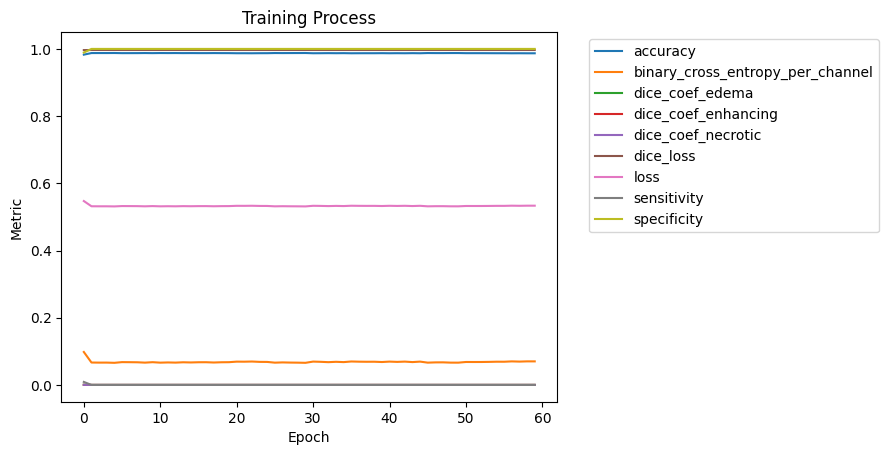

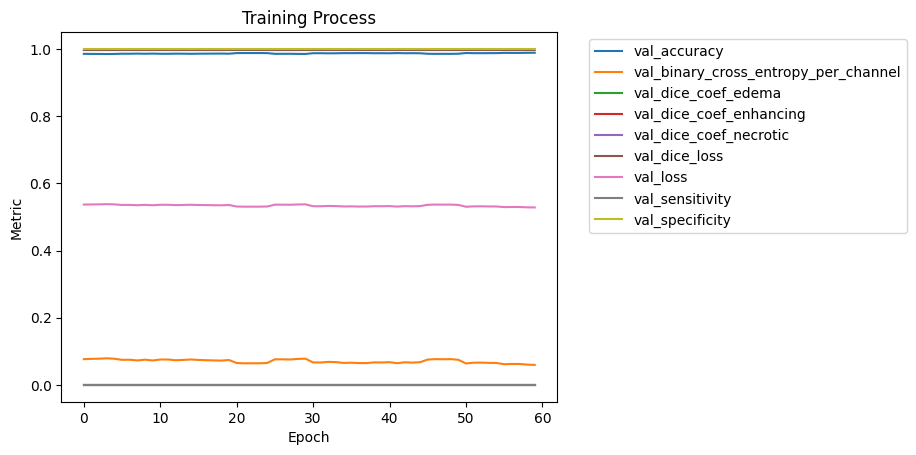

In [6]:
# Get the data frame for the FLAIR + T1ce Multilabel Model
path = "/content/drive/MyDrive/Individual Project Final/saved_models/multilabel/updated/flair_t1ce/training_logs"

frame = get_frame(path)

for col in frame.columns[1:10]:
    plt.plot(frame[col], label=col)

plt.title('Training Process')
plt.xlabel('Epoch')
plt.ylabel('Metric')
# plt.ylim(0, 1)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

for col in frame.columns[10:]:
  plt.plot(frame[col], label=col)

plt.title('Training Process')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

flair_t1ce
epoch                      24.000000
accuracy                    0.992119
binary_crossentropy         0.040044
dice_loss                   0.235648
loss                        0.137846
sensitivity                 0.725669
specificity                 0.997413
val_accuracy                0.867277
val_binary_crossentropy     1.191910
val_dice_loss               0.807730
val_loss                    0.999820
val_sensitivity             0.970887
val_specificity             0.865660
Name: 24, dtype: float64


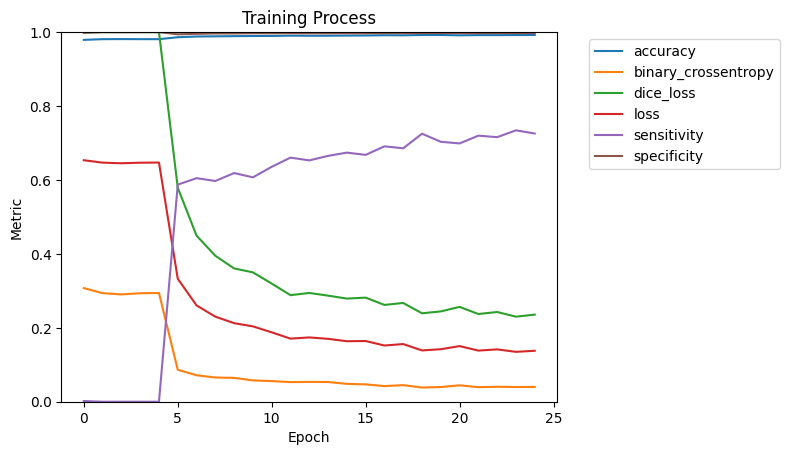

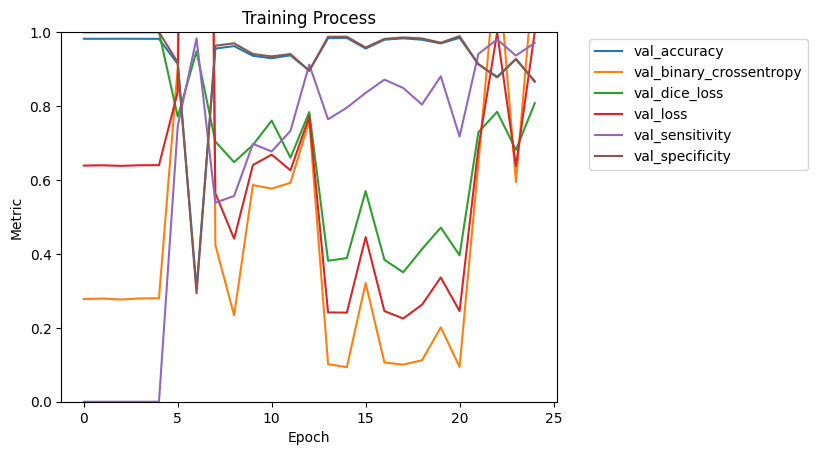

flair
epoch                       1.000000
accuracy                    0.955410
binary_crossentropy         0.434499
dice_loss                   0.917772
loss                        0.676135
sensitivity                 0.735633
specificity                 0.959925
val_accuracy                0.161494
val_binary_crossentropy    11.374404
val_dice_loss               0.967383
val_loss                    6.170895
val_sensitivity             0.843860
val_specificity             0.149693
Name: 1, dtype: float64


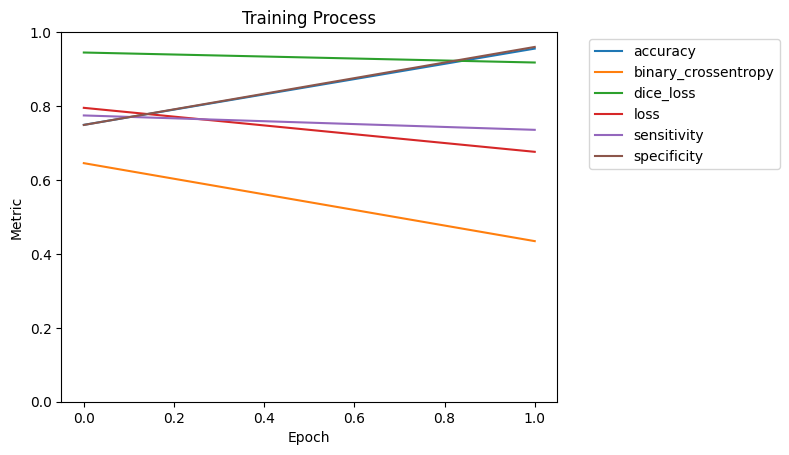

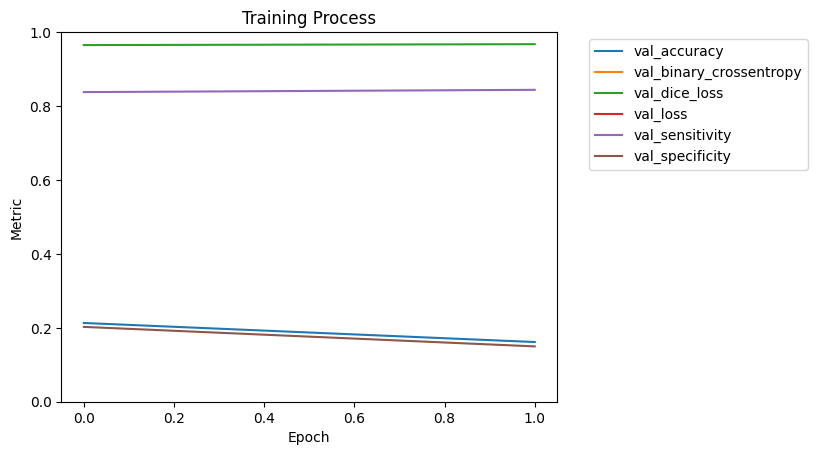

flair_t1ce_t2
epoch                      54.000000
accuracy                    0.981173
binary_crossentropy         0.290406
dice_loss                   1.000000
loss                        0.645203
sensitivity                 0.000000
specificity                 1.000000
val_accuracy                0.980470
val_binary_crossentropy     0.301252
val_dice_loss               1.000000
val_loss                    0.650626
val_sensitivity             0.000000
val_specificity             1.000000
Name: 54, dtype: float64


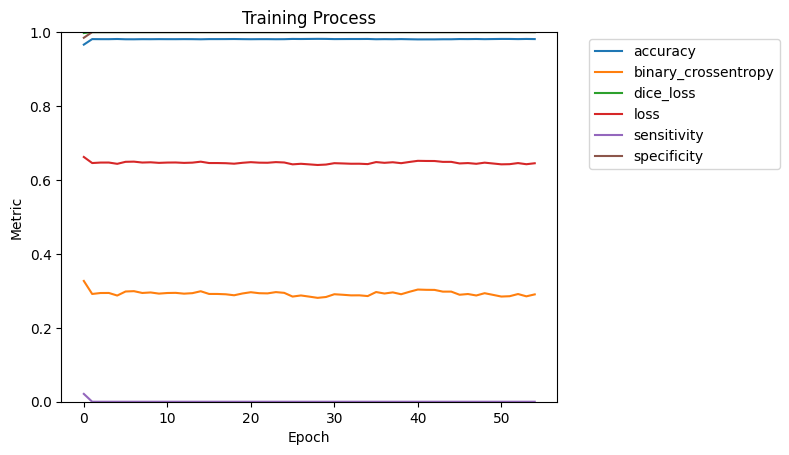

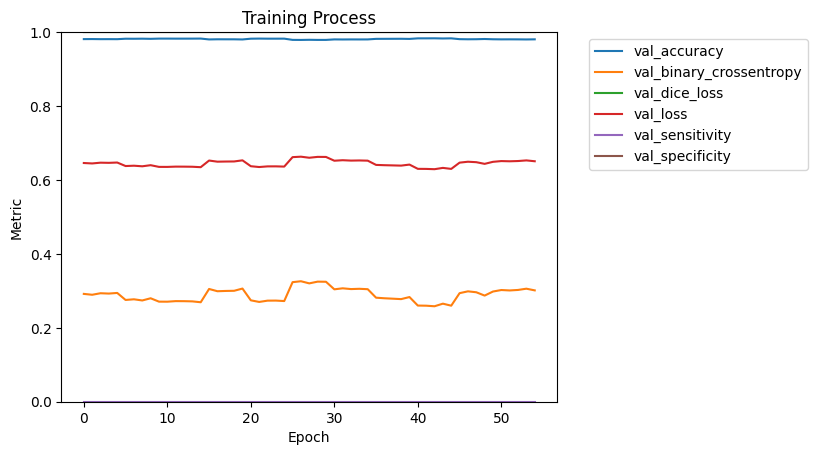

In [13]:
# Get the data frames for the Binary Models
models = ["flair_t1ce", "flair", "flair_t1ce_t2"]
paths = ["/content/drive/MyDrive/Individual Project Final/saved_models/binary/updated/{}/training_logs".format(x) for x in models]


for i,path in enumerate(paths):
  print(models[i])
  frame = get_frame(path)
  print(frame.iloc[-1])

  for col in frame.columns[1:7]:
      plt.plot(frame[col], label=col)

  plt.title('Training Process')
  plt.xlabel('Epoch')
  plt.ylabel('Metric')
  # Limit graph to 1
  plt.ylim(0, 1)

  plt.legend(bbox_to_anchor=(1.05, 1))
  plt.show()

  for col in frame.columns[7:]:
    plt.plot(frame[col], label=col)

  plt.title('Training Process')
  plt.xlabel('Epoch')
  plt.ylabel('Metric')
  plt.legend(bbox_to_anchor=(1.05, 1))
  # Limit graph to 1
  plt.ylim(0, 1)
  plt.show()

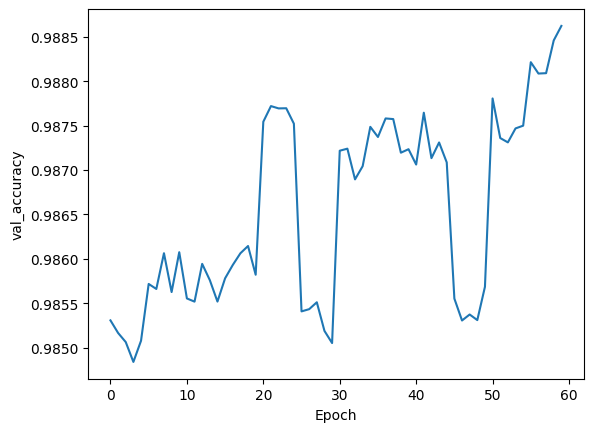

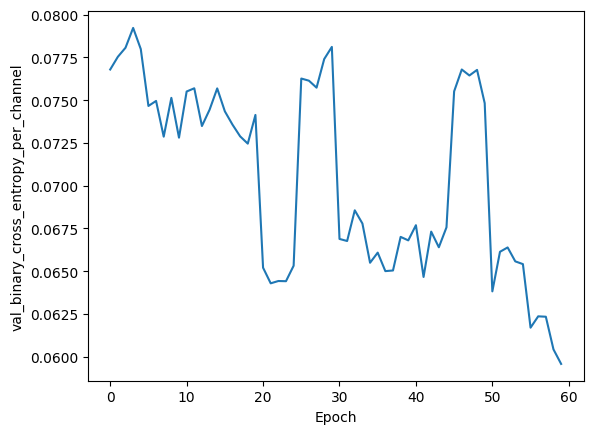

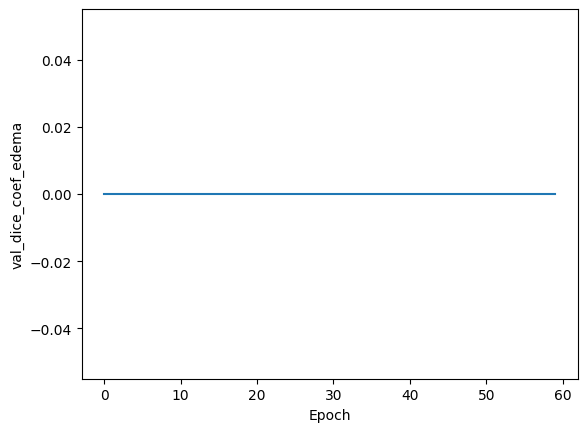

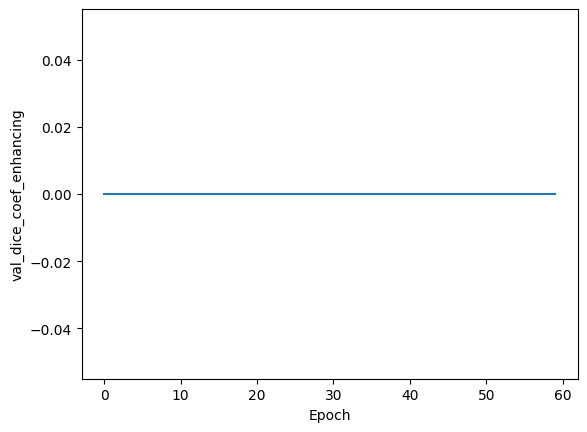

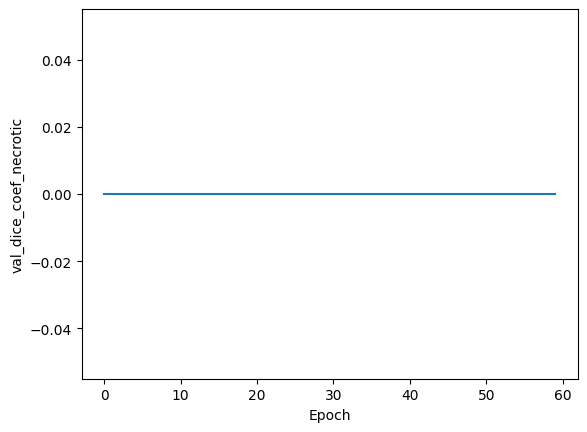

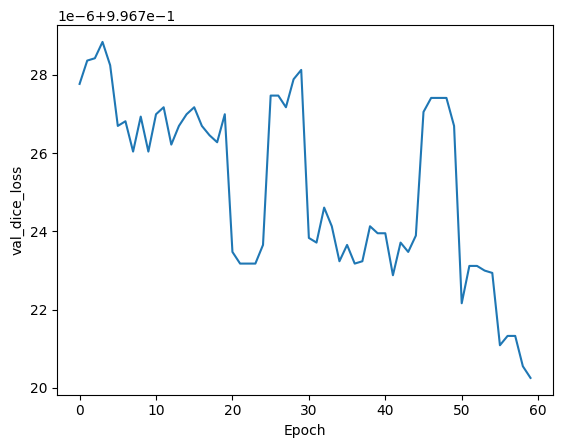

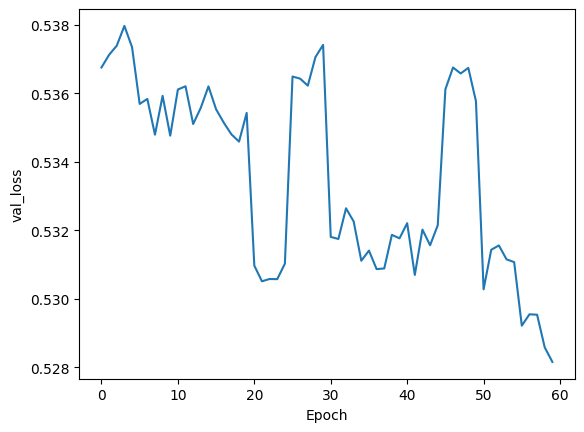

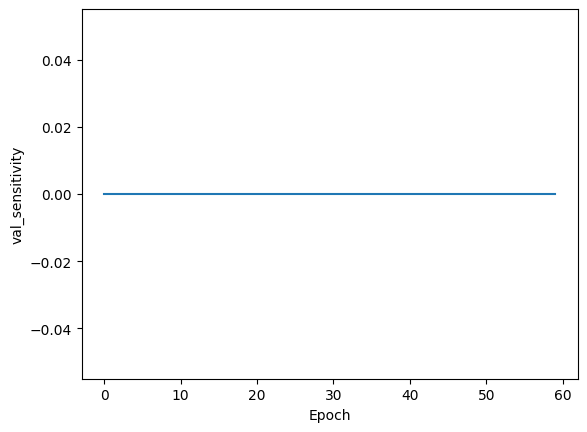

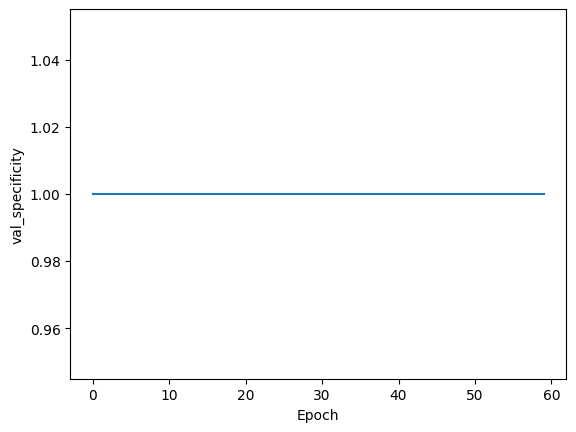

In [ ]:
# Show graphs for each metric
for col in frame.columns[10:]:
    frame[col].plot()
    plt.xlabel('Epoch')
    plt.ylabel(col)
    plt.show()